<html>
<head><H1><font color = "blue"> Segunda Parte: Clase de Métodos Estadísticos. </font></H1></head>
<body>
<sub><H2>3: Creando la Clase Estadística.</H2></sub>
<p>La siguiente Clase se encargara de leea un Data Frame en formato CSV, calcule las propiedades estadísticas descriptivas básicas de cada variable númerica, entrega el nombre de las variables disponibles y por último regrese media, mediana, desviación, percentiles y crea un historigrama del mismo.
<p>Para poder gráficar el historigrama (y no tener que escribir la mayoría de fórmulas con Python base) necesitaremos hacer uso de los módulos de MatPlotLib y Pandas:   
</body>
</html>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Ya con la experiencia de la clase anterior podremos construir esta segunda:
class CLASE2:
    
#Usaremos el mismo método del _init_ anterior para leer un CSV raw y procesarlo como un DataFrame de Pandas:
    def __init__(self, DataFrameCSV):
        self.df = pd.read_csv(DataFrameCSV)

#Recordemos que los métodos de una Clase pueden ser entendidos como funciones de Python; asi, nos serviremos de
#la funcion .describe() de Pandas, integrandolo a nuestro método de clase (lo cual es un poco trampa), esto tambien lo
#haremos con la función del historigrama. Si se quisiera no depender de paquetes externos para ello, basta con reemplazar
#dichos genericos por las respectivas fórmulas:  
    def estadistica_basica(self, variable):
        if variable in self.df.columns:
            estadistica = self.df[variable].describe()
            return estadistica
        else:
            return "Variable no encontrada."

#Nuestro segundo método se encargara de enlistar las "columnas" o mejor dicho Variables de nuestro DataFrame en Pandas:        
    def lista_variables(self):
        return self.df.columns.tolist()

#Este último método se encargara de proveer la información estadística que se pide y además generará un historigrama de
#la respectiva variable, para ello agregamos los plot() de tamaño, historigrama y nombres. Además empaquetamos todos
#los resultados de información estadistica en el generico diccionario "resultado", como sigue: 
    def historigrama_estadistico(self, variable):
        if variable in self.df.columns:
            datos_variable = self.df[variable]
            
            media = datos_variable.mean()
            mediana = datos_variable.median()
            desviacion_estandar = datos_variable.std()
            q25 = datos_variable.quantile(0.25)
            q50 = datos_variable.quantile(0.50)
            q75 = datos_variable.quantile(0.75)
            
            plt.figure(figsize=(8, 6))
            plt.hist(datos_variable, bins=20, edgecolor='black')
            plt.xlabel(variable)
            plt.ylabel('Frecuencia')
            plt.title('Histograma de ' + variable)
            plt.show()
            
            resultado = {'Media': media,
                         'Mediana': mediana,
                         'Desviación estándar': desviacion_estandar,
                         'Percentil 25 (Q25)': q25,
                         'Percentil 50 (Q50)': q50,
                         'Percentil 75 (Q75)': q75}
            return resultado
        else:
            return "Variable no encontrada."

<html>
<body>
    Probemos ahora cada una de las funcionalidades de nuestra clase, por orden de los puntos, para nuestros datos iris.csv:
</body>
</html>

In [3]:
#Primero instanciemos el "iris.csv":
iris_estudiado = CLASE2("iris.csv")

<html>
<body>
    Ahora si, podemos probar nuestros métodos propiamente dichos:
</body>
</html>

In [4]:
#Probando el Método estadistica_basica:
iris_estudiado.estadistica_basica("sepal.length")

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal.length, dtype: float64

In [5]:
#Probando el Método lista_variables:
iris_estudiado.lista_variables()

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

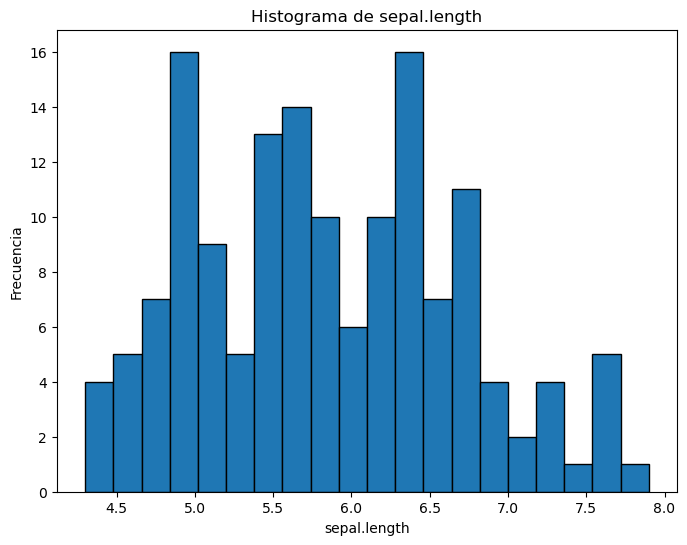

{'Media': 5.843333333333334,
 'Mediana': 5.8,
 'Desviación estándar': 0.8280661279778629,
 'Percentil 25 (Q25)': 5.1,
 'Percentil 50 (Q50)': 5.8,
 'Percentil 75 (Q75)': 6.4}

In [6]:
#Probando el Método historigrama_estadistico:
iris_estudiado.historigrama_estadistico("sepal.length")